In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [12]:
#
x = 5*np.random.randn(500)
y = 2*np.random.randn(500)
x.shape, y.shape

((500,), (500,))

In [14]:
feature = np.zeros(shape=(500, 2))
feature.shape

(500, 2)

In [15]:
feature

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [16]:
feature[:,0] = x
feature[:,1] = y


In [17]:
num_data = np.size(feature,0)
num_data

500

In [18]:
num_feature = np.size(feature,1)
num_feature # 2개 x, y

2

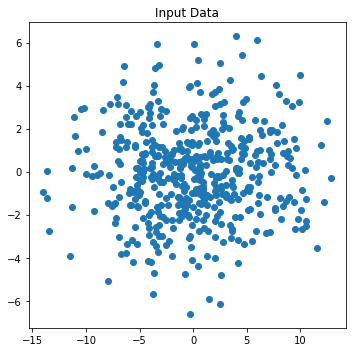

In [20]:
plt.figure(figsize=(5,5))
plt.title('Input Data')
plt.scatter(x, y)

plt.tight_layout()
plt.show()

In [22]:
cluster_k = 4
iteration = 20

loss = np.zeros(iteration) # epoch 마다 여기에 저장
center_iter = np.zeros((iteration, cluster_k, num_feature))
center_iter # 각 주성분 1, 2를 한 행에, 행마다 4개의 군집, 20개 반복


array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
  

In [23]:
# 처음에 라벨(클래스) 무작위
label_pred = np.random.randint(0, cluster_k, size=(num_data)) #(low, high, size)
label_pred # 예상하는 클러스터 

array([2, 0, 1, 3, 0, 0, 0, 1, 2, 1, 1, 3, 3, 0, 0, 0, 2, 2, 2, 1, 2, 3,
       0, 1, 3, 2, 2, 2, 3, 1, 0, 3, 0, 2, 3, 3, 3, 0, 3, 0, 0, 0, 0, 1,
       0, 1, 3, 3, 0, 1, 1, 3, 1, 2, 2, 1, 1, 3, 0, 3, 2, 3, 3, 3, 0, 0,
       0, 2, 0, 0, 2, 3, 2, 0, 3, 3, 0, 1, 1, 1, 1, 2, 2, 3, 0, 2, 3, 3,
       1, 0, 2, 2, 1, 1, 0, 0, 3, 0, 0, 0, 1, 1, 1, 3, 1, 1, 2, 0, 3, 3,
       2, 2, 2, 2, 3, 3, 2, 1, 0, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 0, 3, 3,
       1, 0, 1, 2, 0, 3, 2, 3, 1, 0, 0, 2, 2, 3, 1, 3, 0, 3, 1, 3, 3, 1,
       3, 1, 2, 1, 2, 0, 1, 1, 0, 0, 3, 1, 1, 0, 0, 1, 1, 3, 3, 0, 1, 0,
       2, 2, 0, 0, 3, 3, 0, 0, 3, 1, 1, 1, 3, 1, 3, 3, 3, 2, 2, 0, 3, 1,
       2, 0, 1, 2, 3, 0, 0, 2, 0, 2, 3, 0, 1, 2, 2, 3, 3, 1, 2, 3, 0, 2,
       3, 2, 2, 0, 3, 3, 1, 1, 2, 3, 0, 3, 1, 3, 0, 0, 3, 0, 0, 3, 2, 2,
       1, 0, 1, 2, 3, 1, 0, 2, 0, 2, 3, 3, 1, 2, 0, 0, 0, 1, 0, 1, 2, 2,
       1, 0, 3, 1, 3, 0, 1, 3, 2, 3, 0, 2, 2, 3, 1, 1, 1, 3, 0, 2, 0, 1,
       0, 3, 3, 2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 0,

In [28]:
distance = np.zeros((num_data, cluster_k))
distance.shape

(500, 4)

In [32]:
center

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [48]:
# compute center
# 왜 feature 개수도 들어가지? 
center = np.zeros(shape=(cluster_k, num_feature))
clt_0 = feature[np.where(label_pred==0)]

#clt_1.shape

In [49]:
# 군집 0으로 지정된 점의 좌표값들
clt_0

array([[  0.44992537,  -0.33368342],
       [ -7.01710546,   0.48417734],
       [ -5.82834655,   2.22062486],
       [ -3.7277879 ,  -5.67002991],
       [  3.04784068,  -0.64046269],
       [  8.85701257,   0.93798405],
       [ -4.05529375,   3.125978  ],
       [  4.82767132,   1.09603567],
       [  8.63685127,  -1.34789792],
       [  6.06057855,  -1.43939105],
       [ -4.9674309 ,  -0.01416841],
       [  4.65263631,   1.1503188 ],
       [ -1.76186672,  -0.2193378 ],
       [ -3.83928628,   1.45841576],
       [  5.85160199,  -2.75830342],
       [  7.19122098,  -2.80966534],
       [  2.87221248,   3.22229804],
       [-11.12634722,   2.53880071],
       [ -1.30421946,  -1.9410691 ],
       [ -6.73806292,  -3.83545819],
       [  0.0541963 ,  -0.32956515],
       [ -3.85144831,  -0.35875293],
       [ -7.00000023,   3.15764645],
       [  3.04708377,  -1.03018298],
       [ -7.18364048,   1.3721709 ],
       [ -4.15387212,  -2.01396182],
       [  2.69036633,  -1.04042523],
 

In [50]:
center # 전체 cluster center 좌표값
center[0] # cluster 0의 center 좌표값

array([0., 0.])

In [51]:
np.sum(clt_0, axis=0).shape # 같은 열에 있는 값끼리 덧셈
# 즉, x값, y값끼리 덧셈

(2,)

In [52]:
center[0] = np.sum(clt_0, axis=0) / len(clt_0) # cluster 0 에 속하는 데이터의 x값과 y값 평균
center[0]

array([-0.45239469, -0.25513424])

In [53]:
clt_1 = feature[np.where(label_pred==1)]
clt_2 = feature[np.where(label_pred==2)]
clt_3 = feature[np.where(label_pred==3)]

In [54]:
center[1] = np.sum(clt_1, axis=0) / len(clt_1)
center[2] = np.sum(clt_2, axis=0) / len(clt_2)
center[3] = np.sum(clt_3, axis=0) / len(clt_3)

In [55]:
center

array([[-0.45239469, -0.25513424],
       [-0.43989174, -0.04815157],
       [ 0.78521759,  0.12038276],
       [-0.28423098,  0.07227123]])

In [58]:
loss0 = np.sum((feature-center[0])**2,1)
loss1 = np.sum((feature-center[1])**2,1)
loss2 = np.sum((feature-center[2])**2,1)
loss3 = np.sum((feature-center[3])**2,1)

In [60]:
loss2.shape

(500,)

In [61]:
distance = np.zeros(shape=(num_data, cluster_k))
distance.shape

(500, 4)

In [65]:
distance[:,0] = loss0
distance[:,1] = loss1
distance[:,2] = loss2
distance[:,3] = loss3

In [66]:
distance

array([[25.97706085, 26.55687432, 40.76990148, 28.44516105],
       [ 0.82035147,  0.87330293,  0.31859696,  0.70378473],
       [42.50084735, 42.09087922, 27.60315334, 39.9963474 ],
       ...,
       [85.22357837, 83.29731411, 63.42610136, 79.81387503],
       [23.1140846 , 23.42108051, 36.9171344 , 25.09020467],
       [ 7.50667608,  7.46342445,  2.36630953,  6.69271085]])

In [68]:
# label assign
# update
label_pred = np.zeros(shape =(num_data))
label_pred = np.argmin(distance, axis=1) #데이터와 가장 가까운 군집 선택
label_pred

array([0, 2, 2, 1, 1, 1, 0, 1, 2, 0, 2, 1, 0, 2, 2, 1, 3, 2, 2, 0, 3, 2,
       2, 2, 0, 0, 3, 2, 3, 3, 2, 1, 2, 1, 2, 3, 1, 0, 0, 2, 0, 1, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 2, 0, 1, 0, 3, 1, 2, 2, 2, 1, 1, 0, 2, 0, 0, 3, 2, 0, 3, 2, 0,
       2, 2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0, 2, 2, 3, 0, 0, 2, 2, 2,
       2, 3, 1, 0, 2, 0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 3, 0,
       2, 2, 1, 0, 2, 0, 2, 1, 3, 1, 0, 2, 3, 2, 0, 2, 1, 2, 2, 0, 0, 0,
       2, 3, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 2, 3, 2, 2, 0, 1, 2, 2, 1, 2, 0, 0, 0, 1, 2,
       2, 1, 2, 2, 1, 2, 2, 3, 0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0,
       1, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 2, 1, 2, 0,
       3, 2, 2, 2, 2, 2, 2, 0, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       0, 2, 1, 2, 2, 3, 1, 2, 1, 0, 2, 0, 2, 0, 1,

In [112]:
#혼자해보기
# k=2, 데이터 500개

x = 5*np.random.randn(500)
y = 2*np.random.randn(500)
k = 2
num_data = 500

In [113]:
feature = np.zeros(shape=(num_data,2))
feature.shape

(500, 2)

In [115]:
feature[:,0] = x
feature[:,1] = y

In [117]:
# 임의의 center point (0,0)으로 설정
center = np.zeros(shape=(k, 2))
center

array([[0., 0.],
       [0., 0.]])

In [118]:
label_pred = np.random.randint(0, k, size=num_data)
label_pred, label_pred.shape

(array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 

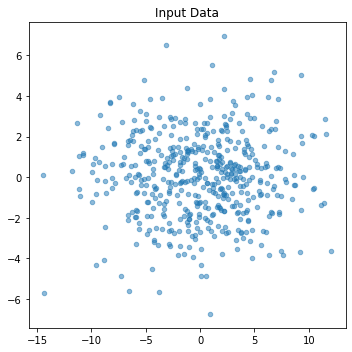

In [173]:
plt.figure(figsize=(5,5))
plt.title('Input Data')
plt.scatter(x, y, alpha=0.5, s=20)

plt.tight_layout()
plt.show()

In [119]:
cluster_0_index = np.where(label_pred==0)
cluster_0 = feature[cluster_0_index]

cluster_1_index = np.where(label_pred==1)
cluster_1 = feature[cluster_1_index]


In [120]:
cluster_0

array([[-2.66117435e+00,  2.05863819e+00],
       [-5.92848440e+00, -1.95824463e+00],
       [-7.31425336e+00, -4.88772524e+00],
       [ 1.92055784e+00,  2.54080821e-01],
       [-3.72080208e+00, -8.55839974e-01],
       [-5.79304874e+00, -7.29620862e-01],
       [-2.17706308e+00,  8.88156886e-02],
       [ 2.53169288e+00, -4.67402734e-01],
       [-4.91571047e+00, -1.91156448e+00],
       [-3.19322467e+00,  6.92900278e-01],
       [ 3.95976994e+00, -4.49964763e-01],
       [-8.68648958e+00, -7.85350760e-01],
       [-2.40387498e+00, -2.73410440e+00],
       [ 6.51277283e+00,  7.81082119e-02],
       [-5.79896082e+00, -1.68074501e+00],
       [-2.80808755e+00, -4.72863113e-01],
       [ 4.70557510e-01, -4.14933661e-02],
       [-2.13337352e+00, -8.96041490e-01],
       [ 1.29990920e+00, -3.59246358e-01],
       [-1.84150122e+00,  1.25734726e+00],
       [-3.82763012e+00,  2.16046067e+00],
       [ 2.43537652e+00,  5.70910519e-03],
       [ 6.36630411e-01,  2.16369910e+00],
       [ 4.

In [121]:
len(cluster_0)

265

In [122]:
len(cluster_1)

235

In [123]:
center[0] = np.sum(cluster_0, axis=0) / len(cluster_0)
center[0]

array([-0.46871752,  0.08203579])

In [124]:
center[1] = np.sum(cluster_1, axis=0) / len(cluster_1)
center[1]

array([ 0.38134796, -0.04623366])

In [125]:
# 첫번째 센터값
center

array([[-0.46871752,  0.08203579],
       [ 0.38134796, -0.04623366]])

In [157]:
center[0,1]

0.08203578726712567

In [126]:
# 라벨 재할당

# cluster 0의 센터와 모든 데이터의 거리 합산
loss0 = np.sum((feature-center[0])**2, 1)
loss1 = np.sum((feature-center[1])**2, 1)

In [127]:
loss0

array([8.71382401e+00, 3.39717987e+01, 3.43525431e+01, 7.15598856e+01,
       1.55405652e+01, 5.29242151e+01, 4.45257829e+01, 4.28661620e+01,
       8.23442799e+01, 5.73823623e+00, 1.14556650e+01, 6.21064659e+01,
       7.40114483e+01, 8.46433791e+01, 2.90072895e+01, 2.91849054e+00,
       8.77467995e+00, 2.57325542e+00, 9.30434522e+00, 2.37501883e+01,
       9.82009471e+01, 3.79211074e+01, 9.73249595e+00, 4.02069402e-01,
       7.79609468e+00, 2.24205947e+01, 6.46594971e+00, 1.98945257e+01,
       6.82841372e+01, 9.28949675e-01, 4.43396083e+01, 1.16754800e+01,
       4.87412229e+01, 2.25931911e+02, 3.15188898e+01, 5.78056497e+00,
       8.97497025e-01, 3.72771477e+00, 1.42469367e+01, 3.32277040e+00,
       3.26589215e+00, 5.77772602e+00, 1.56021439e+01, 5.21238457e+00,
       8.43958793e+00, 5.55511620e+00, 2.35675155e+01, 2.59744011e+01,
       5.56305038e+00, 4.44511858e+01, 1.61302149e+01, 8.10736460e+00,
       1.90731241e+00, 1.63180322e+01, 5.86767204e+01, 2.03033486e+01,
      

In [128]:
loss1

array([1.36874275e+01, 4.34697704e+01, 4.38872902e+01, 8.26623203e+01,
       1.25112411e+01, 4.12237016e+01, 3.52443524e+01, 3.57462971e+01,
       6.80355839e+01, 2.45935585e+00, 1.74830973e+01, 5.09304439e+01,
       8.89683020e+01, 6.96398415e+01, 3.85901926e+01, 6.56370539e+00,
       4.66044978e+00, 5.07602446e+00, 4.80136665e+00, 3.15382870e+01,
       8.19049734e+01, 3.00909893e+01, 9.65481268e+00, 1.35166943e+00,
       1.33238885e+01, 1.50328405e+01, 3.27729831e+00, 1.29681027e+01,
       8.27719718e+01, 3.13501089e+00, 3.39066361e+01, 1.49821159e+01,
       3.76098318e+01, 2.48781191e+02, 4.08678439e+01, 1.03545116e+01,
       7.98081421e-03, 7.04599746e+00, 9.60739065e+00, 9.41731702e-01,
       6.64038169e+00, 3.05102719e+00, 2.25849964e+01, 6.24595124e+00,
       4.22173138e+00, 4.94897197e+00, 1.59642152e+01, 1.87458052e+01,
       2.41229786e+00, 3.37807042e+01, 2.13181434e+01, 4.04232713e+00,
       3.69236931e+00, 1.02506318e+01, 7.25601321e+01, 2.85442053e+01,
      

In [130]:
loss0.shape, loss1.shape


((500,), (500,))

In [131]:
# col0: cluster 0, col1: cluster1
distance = np.zeros((num_data, k))
distance.shape

(500, 2)

In [132]:
distance[:,0] = loss0
distance[:,1] = loss1
distance

array([[8.71382401e+00, 1.36874275e+01],
       [3.39717987e+01, 4.34697704e+01],
       [3.43525431e+01, 4.38872902e+01],
       [7.15598856e+01, 8.26623203e+01],
       [1.55405652e+01, 1.25112411e+01],
       [5.29242151e+01, 4.12237016e+01],
       [4.45257829e+01, 3.52443524e+01],
       [4.28661620e+01, 3.57462971e+01],
       [8.23442799e+01, 6.80355839e+01],
       [5.73823623e+00, 2.45935585e+00],
       [1.14556650e+01, 1.74830973e+01],
       [6.21064659e+01, 5.09304439e+01],
       [7.40114483e+01, 8.89683020e+01],
       [8.46433791e+01, 6.96398415e+01],
       [2.90072895e+01, 3.85901926e+01],
       [2.91849054e+00, 6.56370539e+00],
       [8.77467995e+00, 4.66044978e+00],
       [2.57325542e+00, 5.07602446e+00],
       [9.30434522e+00, 4.80136665e+00],
       [2.37501883e+01, 3.15382870e+01],
       [9.82009471e+01, 8.19049734e+01],
       [3.79211074e+01, 3.00909893e+01],
       [9.73249595e+00, 9.65481268e+00],
       [4.02069402e-01, 1.35166943e+00],
       [7.796094

In [133]:
select = np.argmin(distance, axis=1)

In [134]:
select 

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,

In [139]:
cluster_0_index = np.where(select==0)
cluster_0 = feature[cluster_0_index]

cluster_1_index = np.where(select==1)
cluster_1 = feature[cluster_1_index]


In [146]:
cluster_0

array([[-2.66117435e+00,  2.05863819e+00],
       [-5.92848440e+00, -1.95824463e+00],
       [-5.95388942e+00, -1.98325650e+00],
       [-7.31425336e+00, -4.88772524e+00],
       [-3.72080208e+00, -8.55839974e-01],
       [-8.29119891e+00,  3.66257110e+00],
       [-5.79304874e+00, -7.29620862e-01],
       [-2.17706308e+00,  8.88156886e-02],
       [-1.29900254e+00,  1.45458167e+00],
       [-4.91571047e+00, -1.91156448e+00],
       [-4.96967443e-01,  7.15495607e-01],
       [-3.19322467e+00,  6.92900278e-01],
       [-8.68648958e+00, -7.85350760e-01],
       [-1.37926990e+00, -2.33945282e-01],
       [-2.40387498e+00, -2.73410440e+00],
       [-1.43453878e+01, -5.69463560e+00],
       [-5.79896082e+00, -1.68074501e+00],
       [-2.80808755e+00, -4.72863113e-01],
       [-2.13337352e+00, -8.96041490e-01],
       [-1.84150122e+00,  1.25734726e+00],
       [-3.82763012e+00,  2.16046067e+00],
       [-2.98400873e-01,  2.35873884e+00],
       [-3.48554670e+00, -2.56918214e+00],
       [-8.

In [152]:
cluster_0[:,1]

array([ 2.05863819, -1.95824463, -1.9832565 , -4.88772524, -0.85583997,
        3.6625711 , -0.72962086,  0.08881569,  1.45458167, -1.91156448,
        0.71549561,  0.69290028, -0.78535076, -0.23394528, -2.7341044 ,
       -5.6946356 , -1.68074501, -0.47286311, -0.89604149,  1.25734726,
        2.16046067,  2.35873884, -2.56918214,  1.39877195,  1.70025977,
       -0.37990253, -0.77210796, -0.60169984, -2.63881308,  1.27770922,
        1.5241127 ,  2.3549182 , -2.54035483, -2.34199105,  1.84265775,
        0.09691027, -2.87454889, -0.02001356, -1.91389195, -0.84484488,
        1.76624028, -0.68990409,  2.91758353,  0.57973067, -0.91728969,
        2.68570102,  1.2694528 ,  3.06603048,  2.75539374,  0.7984997 ,
       -3.09669267, -2.67324934,  1.05905614,  2.40809496,  1.92341623,
        2.65440264, -2.21006534, -1.85430855,  2.94291639, -0.23167113,
        0.59297209,  0.35944003, -0.52058577,  1.10831927,  0.40114079,
       -0.80746806,  1.59228756,  1.86183269,  2.49711355,  2.50

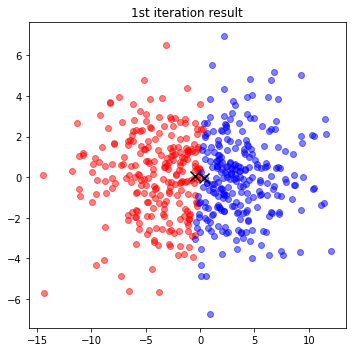

In [170]:
plt.figure(figsize=(5,5))
plt.title("1st iteration result")
plt.scatter(cluster_0[:,0], cluster_0[:,1], color='red', alpha=0.5)
plt.scatter(center[0,0], center[0,1], marker='x', color='black', s=100)
plt.scatter(cluster_1[:,0], cluster_1[:,1], color='blue', alpha=0.5)
plt.scatter(center[1,0], center[1,1], marker='x', color='black', s=100)
plt.tight_layout()
plt.show()

In [ ]:
iteration = 10

In [ ]:
# 반복문으로 돌리기

for 

In [174]:
# 사실 sklearn 으로 한방에 가능 ㅋ...
# 머리 나빠도 인공지능 할 수 있다..!

from sklearn.cluster import KMeans

In [186]:
kmeans = KMeans(n_clusters=10)

In [187]:
kmeans.fit(feature)

KMeans(n_clusters=10)

In [188]:
label_sklearn = kmeans.predict(feature)

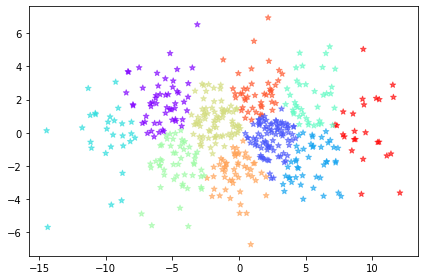

In [189]:
plt.scatter(feature[:,0], feature[:,1], marker='*', c=label_sklearn, cmap='rainbow', alpha=0.6)
plt.tight_layout()
plt.show()